<a href="https://colab.research.google.com/github/smriti-nayak/Analysing-Mental-Health-during-COVID/blob/main/PostCovid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Loading and Exploring the Dataset

In [ ]:
import pandas as pd
file = '/content/drive/My Drive/Datasets/Post Covid Mini.csv'

import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

data = pd.read_csv(file, encoding='Windows-1252')
data.head(15)

,tweets,label
0,@janie_crawford ha...yes ma'am...been branding...,0
1,I really miss XYZ since 2016 i have Post anime...,1
2,boys before flowers is AWESOME. specially so y...,0
3,RT: #BipolarHotline: National #Suicide Hotline...,1
4,Only 2 days of sophmore year left! thank godd ...,0
5,There's #noshame in talking about other illnes...,1
6,ok so like... how am i supposed to tell my mom...,1
7,Searching for Susan Boyle on Microsoft's Bing ...,0
8,@PressSec @FoxNews @EricFolmer When Obama came...,1
9,Good morning my twitter friends... Time for wo...,0


In [ ]:
data.tweets[:15]

0     @janie_crawford ha...yes ma'am...been branding...
1     I really miss XYZ since 2016 i have Post anime...
2     boys before flowers is AWESOME. specially so y...
3     RT: #BipolarHotline: National #Suicide Hotline...
4     Only 2 days of sophmore year left! thank godd ...
5     There's #noshame in talking about other illnes...
6     ok so like... how am i supposed to tell my mom...
7     Searching for Susan Boyle on Microsoft's Bing ...
8     @PressSec @FoxNews @EricFolmer When Obama came...
9     Good morning my twitter friends... Time for wo...
10    this movie just worsened my depression tbh :) ...
11    I need a job!! I hate being unemployed #unempl...
12    @BananaAnna2008 @mikequad I TOTALLY AGREE WITH...
13    It's hard for someone who has depression to ad...
14    I understand  You just gotta work on it! haha....
Name: tweets, dtype: object

In [ ]:
print(data.tweets[11])

I need a job!! I hate being unemployed #unemployed #corona #jobs #lockdown #crisis


In [ ]:
data.shape

(449, 2)

### 2. Preprocessing the Data

*   Lowercasing
*   Removal of non-alphabetical characters
*   Tokenization
*   Stop-word removal
*   Stemming

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import re
import string

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stop = stopwords.words('english')
punc = string.punctuation
print(stop)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'thr

In [ ]:
# Lowercasing
data['tweets'] = data['tweets'].str.lower()

print(data.tweets[11])

i need a job!! i hate being unemployed #unemployed #corona #jobs #lockdown #crisis


In [ ]:
# Removing non-alphabetic characters
data['tweets'] = data['tweets'].str.replace('[^a-z\s]', '')

print(data.tweets[11])

i need a job i hate being unemployed unemployed corona jobs lockdown crisis


In [ ]:
# Tokennization
data['tweets'] = data['tweets'].apply(word_tokenize)

print(data.tweets[11])

['i', 'need', 'a', 'job', 'i', 'hate', 'being', 'unemployed', 'unemployed', 'corona', 'jobs', 'lockdown', 'crisis']


In [ ]:
# Removing stopwords and Stemming

stemmer = PorterStemmer()

def clean(df):
  clean_tokens = []
  for word in df:
    if(word not in stop and word not in punc):
      clean_tokens.append(stemmer.stem(word))
  return clean_tokens

data['tweets'] = data['tweets'].apply(clean)

In [ ]:
print(data.tweets[11])

['need', 'job', 'hate', 'unemploy', 'unemploy', 'corona', 'job', 'lockdown', 'crisi']


In [ ]:
data.head(15)

,tweets,label
0,"[janiecrawford, hay, maambeen, brand, whiletha...",0
1,"[realli, miss, xyz, sinc, post, anim, depress,...",1
2,"[boy, flower, awesom, special, yijung, cha, ga...",0
3,"[rt, bipolarhotlin, nation, suicid, hotlin, lo...",1
4,"[day, sophmor, year, left, thank, godd, lt, tx...",0
5,"[there, nosham, talk, ill, depress, notalon, k...",1
6,"[ok, like, suppos, tell, mom, depress, without...",1
7,"[search, susan, boyl, microsoft, bing, twiligh...",0
8,"[presssec, foxnew, ericfolm, obama, came, offi...",1
9,"[good, morn, twitter, friend, time, work, unem...",0


### 3. Analysis of Data (Word Frequency Distribution Analysis)

In [ ]:
from nltk.probability import FreqDist

fdist = FreqDist()
for doc in data.tweets:
  for word in doc:
    fdist[word] +=1

In [ ]:
vocab = fdist.most_common(50)
print(vocab)

[('depress', 114), ('im', 50), ('get', 33), ('like', 32), ('day', 31), ('go', 31), ('good', 25), ('time', 24), ('thing', 24), ('think', 23), ('got', 22), ('anxieti', 22), ('love', 20), ('u', 19), ('lockdown', 18), ('make', 18), ('quarantin', 18), ('dont', 18), ('see', 18), ('one', 18), ('tri', 17), ('lol', 17), ('great', 16), ('ill', 16), ('thank', 15), ('new', 15), ('that', 15), ('life', 14), ('stayhom', 14), ('feel', 14), ('covid', 14), ('viru', 14), ('us', 13), ('unemploy', 13), ('job', 13), ('cant', 13), ('everyon', 13), ('know', 13), ('realli', 12), ('could', 12), ('face', 12), ('last', 12), ('mental', 11), ('live', 11), ('friend', 11), ('corona', 11), ('peopl', 11), ('hope', 11), ('home', 11), ('night', 11)]


In [ ]:
# Storing the most common 50 words in a list

lst = [tup[0] for tup in vocab]
print(lst)

['depress', 'im', 'get', 'like', 'day', 'go', 'good', 'time', 'thing', 'think', 'got', 'anxieti', 'love', 'u', 'lockdown', 'make', 'quarantin', 'dont', 'see', 'one', 'tri', 'lol', 'great', 'ill', 'thank', 'new', 'that', 'life', 'stayhom', 'feel', 'covid', 'viru', 'us', 'unemploy', 'job', 'cant', 'everyon', 'know', 'realli', 'could', 'face', 'last', 'mental', 'live', 'friend', 'corona', 'peopl', 'hope', 'home', 'night']


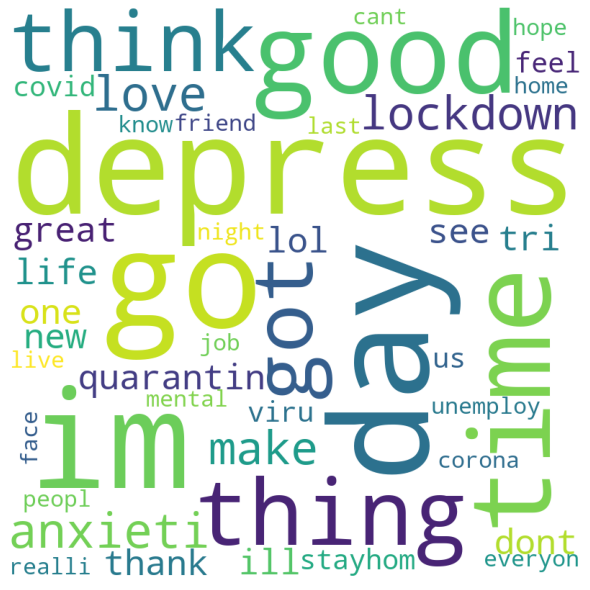

In [ ]:
#Generate WordCloud of the 50 most frequent 
from wordcloud import WordCloud
import matplotlib.pyplot as plt

words=""
for word in lst:
  words = words+" "+word
#print(words)
wcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(words)

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
with open('nlargest.txt', 'w') as f:
  for item in lst:
    f.write("%s\n" % item)

### 4. Feature Preparation

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [ ]:
#Preparing data to create TF-IDF features

d = data.tweets
merged = []
for doc in d:
  merged.append((' '.join(doc)))

data.tweets = merged
data.head(15)

,tweets,label
0,janiecrawford hay maambeen brand whilethank mu...,0
1,realli miss xyz sinc post anim depress longest...,1
2,boy flower awesom special yijung cha gaeul sto...,0
3,rt bipolarhotlin nation suicid hotlin logic li...,1
4,day sophmor year left thank godd lt txt mehhh ...,0
5,there nosham talk ill depress notalon keeptalk...,1
6,ok like suppos tell mom depress without cri ge...,1
7,search susan boyl microsoft bing twilight new ...,0
8,presssec foxnew ericfolm obama came offic wars...,1
9,good morn twitter friend time work unemploy lo...,0


In [ ]:
pipeline = Pipeline([
   ( 'bow',CountVectorizer()),
    ('classifier',MultinomialNB()),
])

### 5. Training the DataSet
The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.tweets, data.label, test_size=0.32, random_state=42)

In [ ]:
pipeline.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
preds = pipeline.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preds)

0.9236111111111112

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score
print("Acccuracy: "+ str(accuracy_score(y_test, preds)))
print("F1 Score: "+ str(f1_score(y_test, preds)))
print("Recall: "+ str(recall_score(y_test, preds)))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        99
           1       0.85      0.91      0.88        45

    accuracy                           0.92       144
   macro avg       0.91      0.92      0.91       144
weighted avg       0.93      0.92      0.92       144

